In [13]:
from src.solver_results.results_dataset import VRPTableDataset
from src.solver_results.vrp_instance import VRPInstance
from src.solver_results.pca_analysis import PCAAnalyzer
from src.solver_results.classification_analysis import ClassificationAnalyzer
from src.solver_results.first_valid_dataset import FirstValidDataset

import pandas as pd
import numpy as np

In [14]:
def load_vrp_instances(path, instance_range, until_first_valid=False):
    """Load VRP instances from CSV files."""
    instances = []

    for i in instance_range:
        filename = f"instance_{i}.csv"
        try:
            df = pd.read_csv(f"{path}/{filename}")

            instance = VRPInstance(i, df, until_first_valid=until_first_valid)
            instances.append(instance)
        except Exception as e:
            print(f"Error processing {filename}: {e}")

    return instances


def run_pca_analysis(X, Y, feature_cols):
    """Run PCA analysis."""
    print("\n" + "=" * 50)
    print("PCA ANALYSIS")
    print("=" * 50)

    pca_analyzer = PCAAnalyzer()
    pca_analyzer.plot_analysis(X, Y, feature_cols)

    # Find optimal components
    optimal_components, results_df = pca_analyzer.find_optimal_components(X, Y)

    return pca_analyzer


def run_classification_analysis(X, Y, feature_cols):
    """Run classification analysis."""
    print("\n" + "=" * 50)
    print("CLASSIFICATION ANALYSIS")
    print("=" * 50)

    classifier_analyzer = ClassificationAnalyzer()

    # Analyze with original features
    results_original = classifier_analyzer.run_analysis(
        X, Y, feature_cols, "Original Features"
    )

    # Analyze with PCA features
    pca_analyzer = PCAAnalyzer()
    X_pca, pca_reduced = pca_analyzer.get_pca_features(X, n_components=0.95)
    pca_feature_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

    results_pca = classifier_analyzer.run_analysis(
        X_pca, Y, pca_feature_names, f"PCA Features ({X_pca.shape[1]} components)"
    )

    return results_original, results_pca





In [15]:
path = "output/resnet_1_1_2e-07_CustomCosts_29_07"

VRPInstances = load_vrp_instances(path, range(301, 400), False)

    # Define features
feature_cols = [
    "entropy_score",
    "classifier_score",
    # "iter",
    "entropy_variation",
    "classifier_score_variation",
    "top_arc_value",
    "top_3_arcs",
    "top_arc_variation",
    "top_3_arcs_variation",
]

# Create dataset
dataset = VRPTableDataset(
    vrp_instances=VRPInstances,
    feature_cols=feature_cols,
    target_col="first_time_valid",
    # target_col="valid"
)

first_valid_dataset = FirstValidDataset(VRPInstances)

X, Y = dataset.get_sklearn_inputs()

Cost difference computed and added to dataset.



PCA ANALYSIS


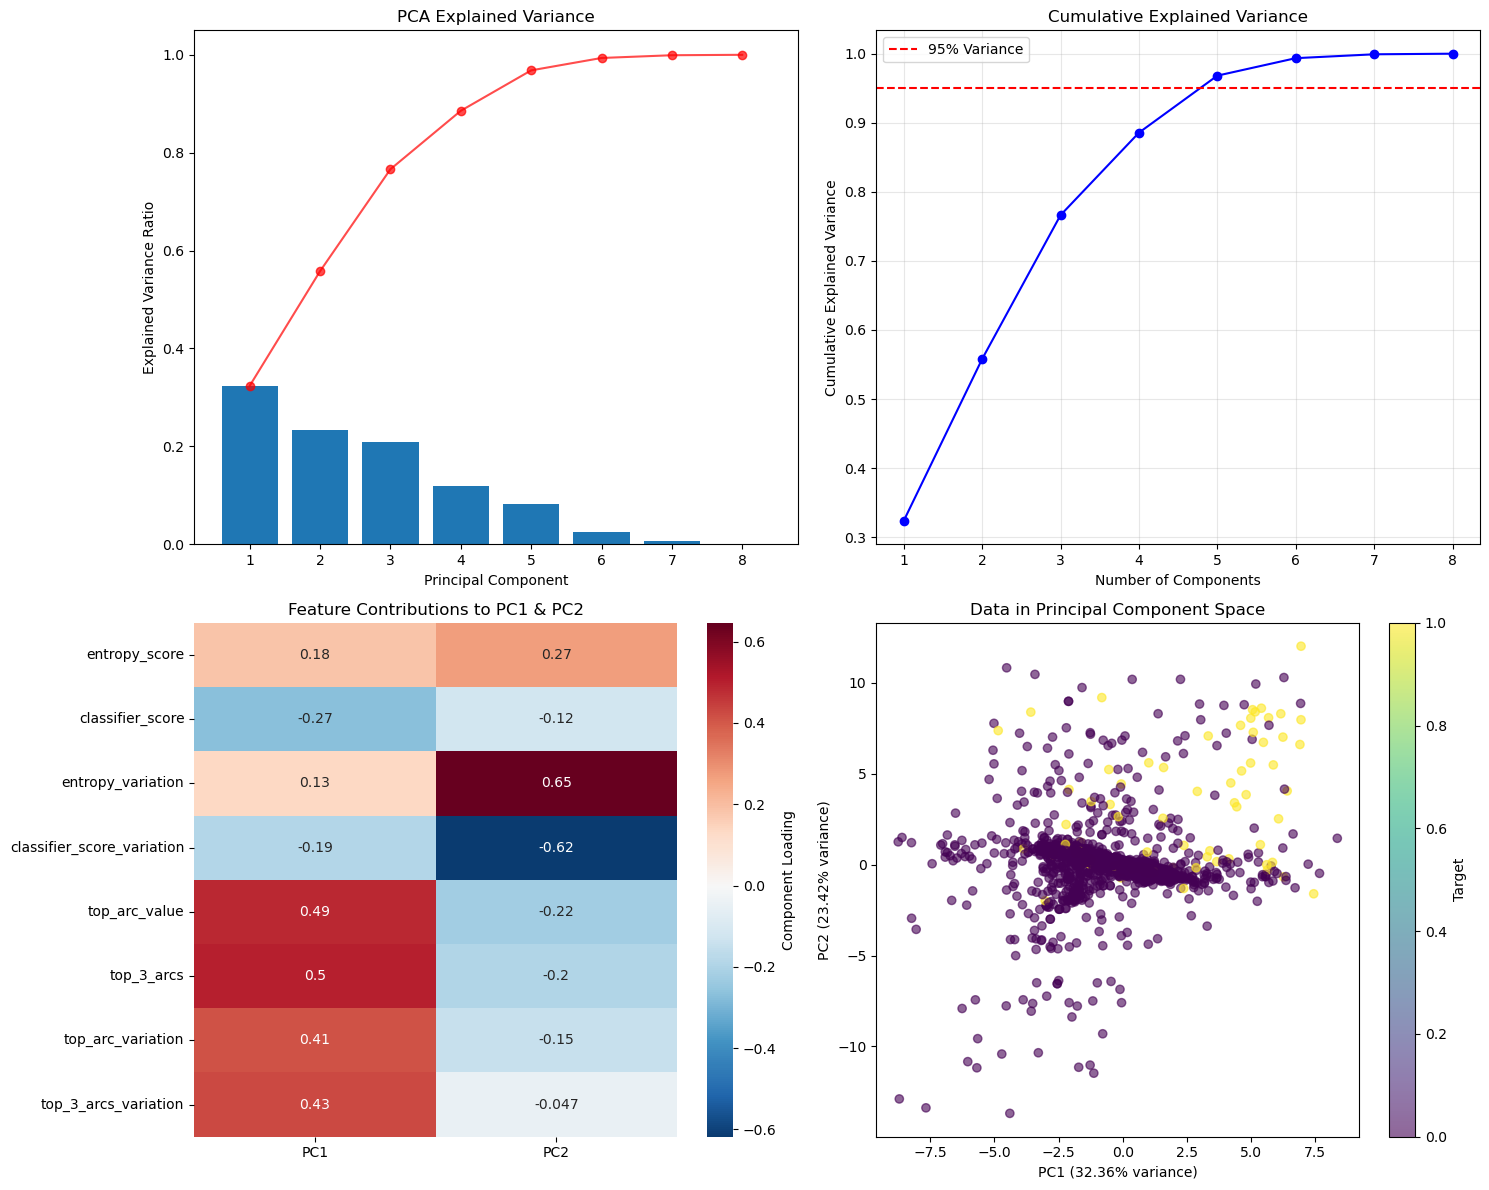


=== PCA Analysis Results ===
Total variance explained by first 2 components: 55.79%
Total variance explained by first 3 components: 76.62%

Most important features for PC1:
top_3_arcs                    0.499908
top_arc_value                 0.487395
top_3_arcs_variation          0.428331
top_arc_variation             0.409334
classifier_score              0.270076
classifier_score_variation    0.192595
entropy_score                 0.182980
entropy_variation             0.134168
dtype: float64

Most important features for PC2:
entropy_variation             0.646312
classifier_score_variation    0.617922
entropy_score                 0.269175
top_arc_value                 0.224346
top_3_arcs                    0.197308
top_arc_variation             0.146482
classifier_score              0.122721
top_3_arcs_variation          0.047112
dtype: float64


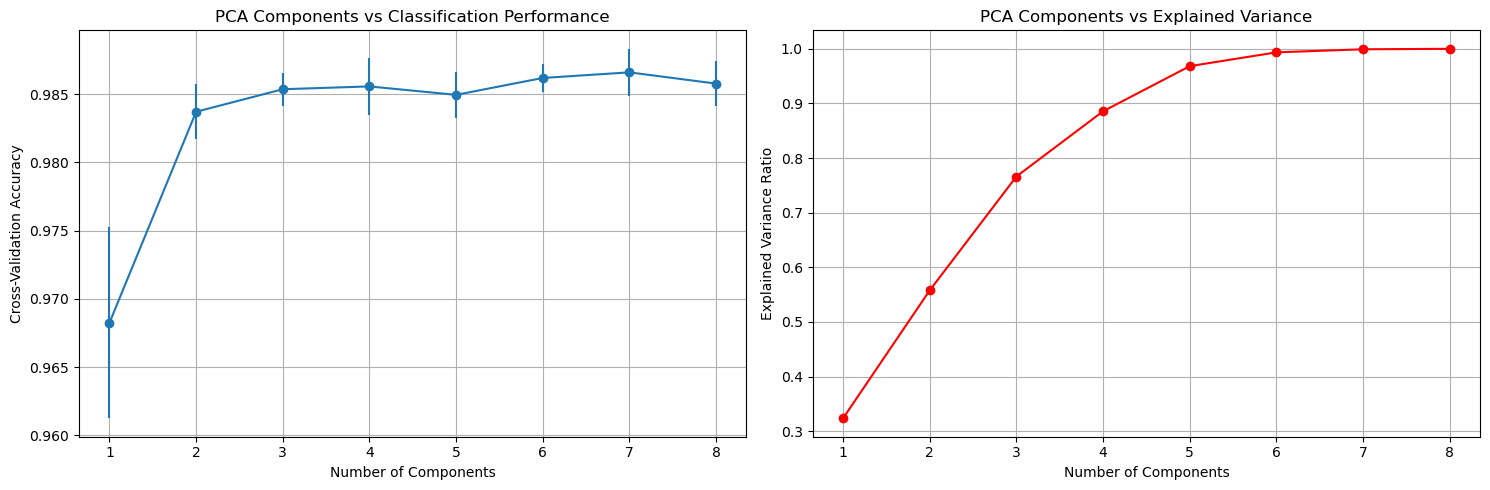

Optimal number of components: 7.0
Best accuracy: 0.987


In [16]:
run_pca_analysis(X, Y, feature_cols)


CLASSIFICATION ANALYSIS

Original Features:

Random Forest:
  Test Accuracy: 0.984
  CV Accuracy: 0.986 (+/- 0.005)
  ROC AUC: 0.828
  Confusion Matrix:
[[2381    5]
 [  33    7]]

Gradient Boosting:
  Test Accuracy: 0.979
  CV Accuracy: 0.983 (+/- 0.010)
  ROC AUC: 0.817
  Confusion Matrix:
[[2368   18]
 [  32    8]]

SVM:
  Test Accuracy: 0.966
  CV Accuracy: 0.967 (+/- 0.016)
  ROC AUC: 0.810
  Confusion Matrix:
[[2320   66]
 [  17   23]]

Logistic Regression:
  Test Accuracy: 0.927
  CV Accuracy: 0.929 (+/- 0.019)
  ROC AUC: 0.806
  Confusion Matrix:
[[2225  161]
 [  15   25]]

Decision Tree:
  Test Accuracy: 0.947
  CV Accuracy: 0.886 (+/- 0.083)
  ROC AUC: 0.760
  Confusion Matrix:
[[2276  110]
 [  18   22]]

Best Classifier: Random Forest

Feature Importance (Random Forest):
  classifier_score_variation: 0.2369
  entropy_variation: 0.2251
  top_3_arcs_variation: 0.1525
  top_arc_variation: 0.1045
  classifier_score: 0.0807
  top_3_arcs: 0.0762
  top_arc_value: 0.0644
  entropy_

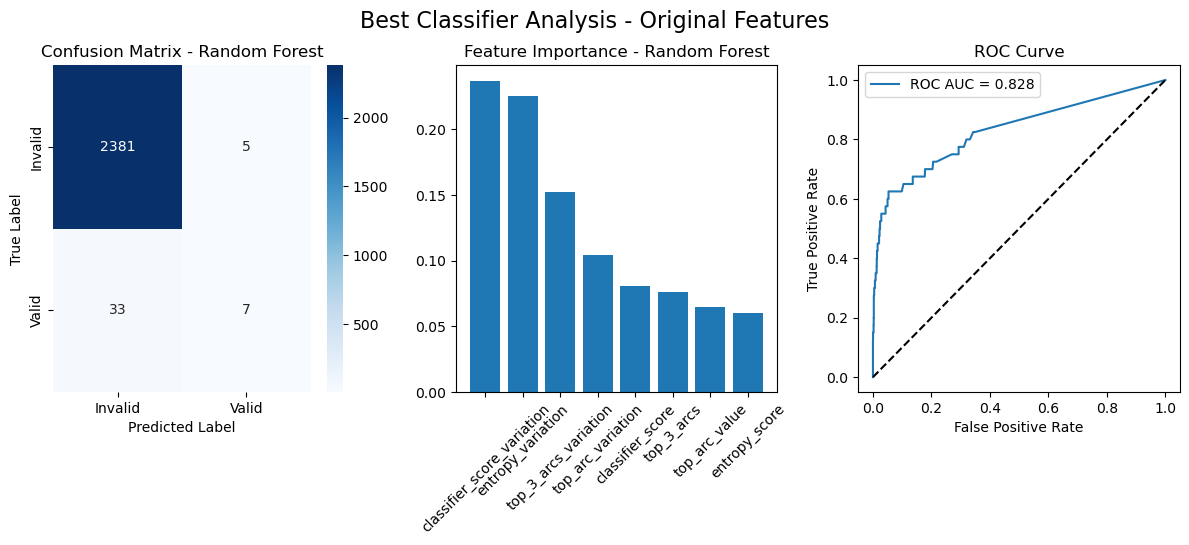

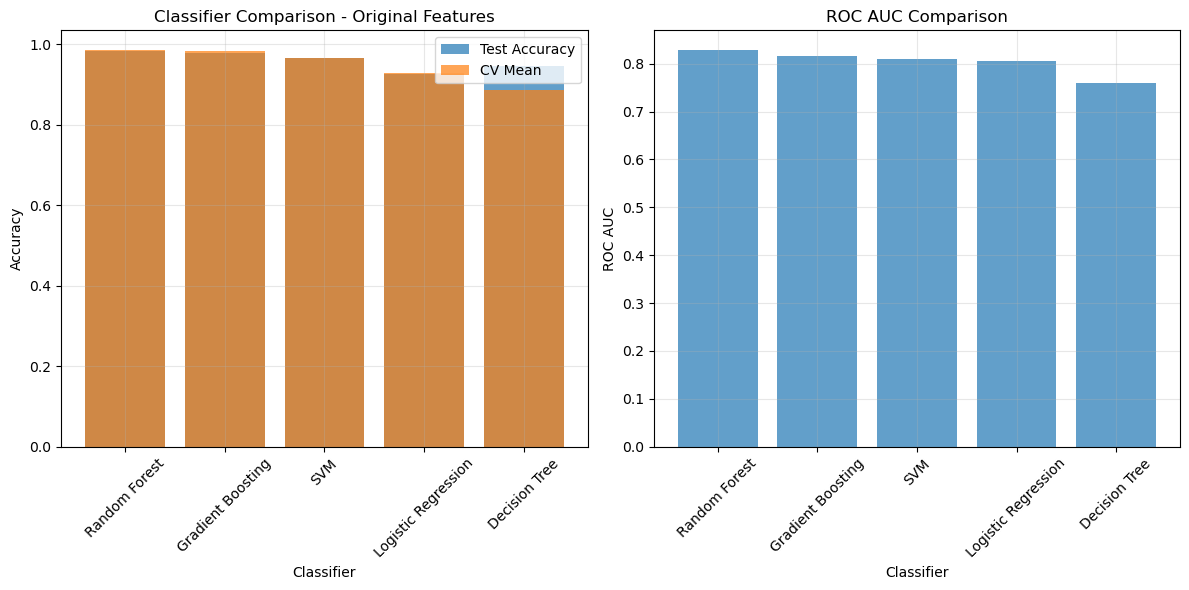


Classifier Comparison - Original Features:
         Classifier  Test Accuracy  CV Mean  CV Std  ROC AUC
      Random Forest          0.984    0.986   0.002    0.828
  Gradient Boosting          0.979    0.983   0.005    0.817
                SVM          0.966    0.967   0.008    0.810
Logistic Regression          0.927    0.929   0.010    0.806
      Decision Tree          0.947    0.886   0.041    0.760

PCA Features (5 components):

Random Forest:
  Test Accuracy: 0.986
  CV Accuracy: 0.984 (+/- 0.006)
  ROC AUC: 0.784
  Confusion Matrix:
[[2383    3]
 [  31    9]]

Gradient Boosting:
  Test Accuracy: 0.982
  CV Accuracy: 0.979 (+/- 0.003)
  ROC AUC: 0.802
  Confusion Matrix:
[[2372   14]
 [  30   10]]

SVM:
  Test Accuracy: 0.947
  CV Accuracy: 0.949 (+/- 0.018)
  ROC AUC: 0.737
  Confusion Matrix:
[[2281  105]
 [  24   16]]

Logistic Regression:
  Test Accuracy: 0.931
  CV Accuracy: 0.929 (+/- 0.010)
  ROC AUC: 0.808
  Confusion Matrix:
[[2234  152]
 [  15   25]]

Decision Tree:


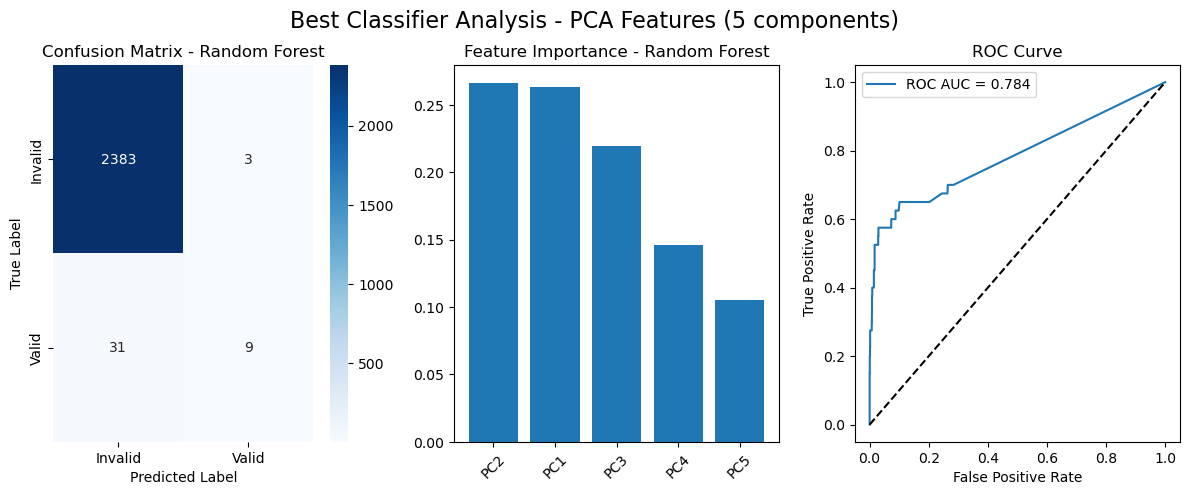

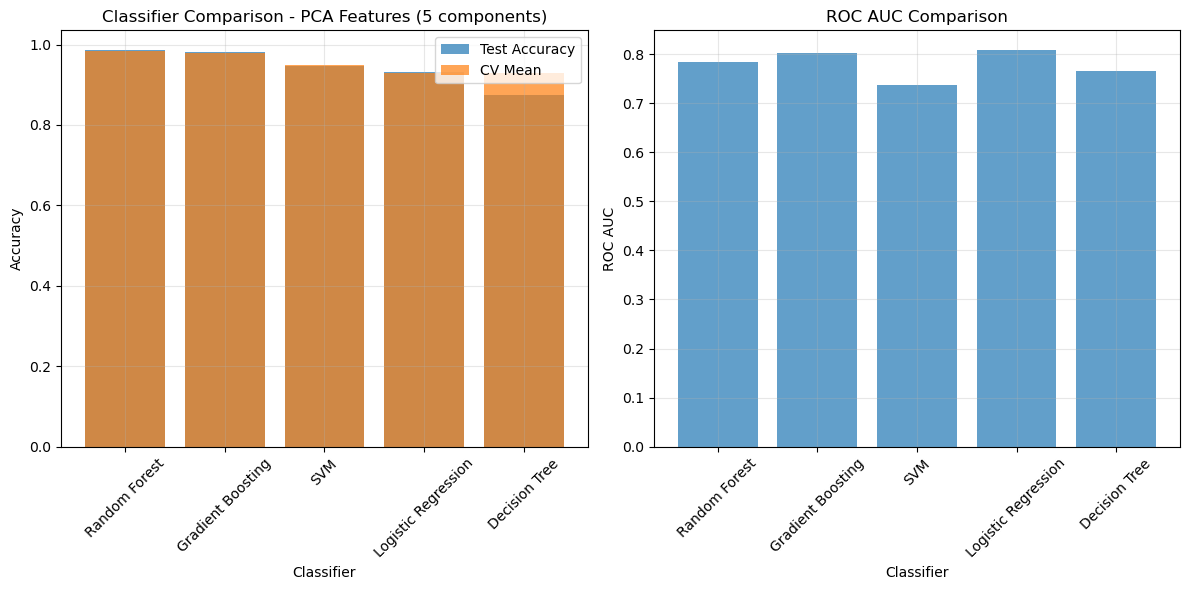


Classifier Comparison - PCA Features (5 components):
         Classifier  Test Accuracy  CV Mean  CV Std  ROC AUC
      Random Forest          0.986    0.984   0.003    0.784
  Gradient Boosting          0.982    0.979   0.002    0.802
                SVM          0.947    0.949   0.009    0.737
Logistic Regression          0.931    0.929   0.005    0.808
      Decision Tree          0.873    0.930   0.021    0.766


({'Random Forest': {'accuracy': 0.9843363561417972,
   'cv_mean': 0.9855670103092784,
   'cv_std': 0.0022586497216708205,
   'confusion_matrix': array([[2381,    5],
          [  33,    7]], dtype=int64),
   'classifier': RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42),
   'roc_auc': 0.8284000419111484,
   'predictions': array([False, False, False, ..., False, False, False]),
   'probabilities': array([0.01      , 0.        , 0.03746223, ..., 0.        , 0.        ,
          0.        ]),
   'Y_test': array([False, False, False, ..., False, False, False])},
  'Gradient Boosting': {'accuracy': 0.9793899422918384,
   'cv_mean': 0.9826804123711341,
   'cv_std': 0.004809032490594091,
   'confusion_matrix': array([[2368,   18],
          [  32,    8]], dtype=int64),
   'classifier': GradientBoostingClassifier(max_depth=5, random_state=42),
   'roc_auc': 0.8171207041072925,
   'predictions': array([False, False, False, ..., False, False, False]),
   'probabili

In [17]:
run_classification_analysis(X, Y, feature_cols)

In [18]:
first_valid_dataset.print_summary()

FIRST VALID DATASET SUMMARY
Total VRP instances: 99
Instances with first valid: 80
Instances without valid: 19
Success rate: 80.8%

First Valid Iteration Statistics:
  Average iteration to first valid: 4.8
  Min iteration to first valid: 2.0
  Max iteration to first valid: 25.0

Cost Statistics (first valid):
  Average solver cost difference : -0.01
  Average easy cost difference: 2.33
